# Linear Model From Scratch Code

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [54]:
# Create synthetic linear dataata
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [55]:
print("First 5 samples of X:", X[:5])
print("First 5 samples of y:", y[:5])

First 5 samples of X: [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]]
First 5 samples of y: [[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]]


In [56]:
class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.w = 0
        self.b = 0

        for _ in range(self.epochs):
            y_pred = self.w * X + self.b
            error = y_pred - y
 
            # Gradients
            dw = (2 / n_samples) * np.dot(X.T, error)
            db = (2 / n_samples) * np.sum(error)

            # Update weights
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return self.w * X + self.b
    def plot(self, X, y):
        plt.scatter(X, y, color='blue', label='Data points')
        plt.plot(X, self.predict(X), color='red', label='Regression line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Simple Linear Regression')
        plt.legend()
        plt.show()


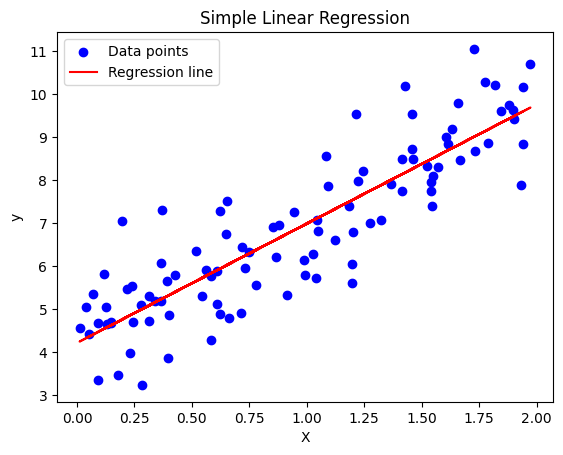

Learned parameters:
Weight (w): [[2.77011339]]
Bias (b): 4.215096157546739


In [57]:
model = SimpleLinearRegression(learning_rate=0.1, epochs=1000)
model.fit(X, y)
y_pred = model.predict(X)

# Plot the results
model.plot(X, y)

print("Learned parameters:")
print("Weight (w):", model.w)
print("Bias (b):", model.b)

In [58]:
# Predict and evaluate
print("MSE:", mean_squared_error(y, y_pred))
print("R2 Score:", r2_score(y, y_pred))

MSE: 0.806584563967053
R2 Score: 0.7692735413614225


## Comparision with Scikit-Learn

In [59]:
sk_model = LinearRegression()
sk_model.fit(X, y)

print(f"Custom Weights: w = {float(model.w.item()):.2f}, b = {float(model.b.item()):.2f}")
print(f"Sklearn Weights: w = {float(sk_model.coef_[0][0]):.2f}, b = {float(sk_model.intercept_[0]):.2f}")

Custom Weights: w = 2.77, b = 4.22
Sklearn Weights: w = 2.77, b = 4.22


In [60]:
class MultiLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            dw = (2 / n_samples) * np.dot(X.T, error)
            db = (2 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot(self, X, y):
        y_pred = self.predict(X)
        plt.scatter(y, y_pred, label='Predicted vs Actual')
        plt.xlabel('Actual y')
        plt.ylabel('Predicted y')
        plt.title('Predicted vs Actual Values')
        plt.legend()
        plt.show()

In [61]:
# Create synthetic multi-dimensional data
X_multi = np.random.rand(100, 3)
y_multi = 3 + 2 * X_multi[:, 0] + 4 * X_multi[:, 1] + 5 * X_multi[:, 2] + np.random.randn(100)

print("First 5 samples of multi-dimensional X:", X_multi[:5])
print("First 5 samples of multi-dimensional y:", y_multi[:5])

First 5 samples of multi-dimensional X: [[0.7948113  0.50263709 0.57690388]
 [0.49251769 0.19524299 0.72245212]
 [0.28077236 0.02431597 0.6454723 ]
 [0.17711068 0.94045858 0.95392858]
 [0.91486439 0.3701587  0.01545662]]
First 5 samples of multi-dimensional y: [ 9.4899341   8.42524851  6.4361046  12.50854851  5.32002623]


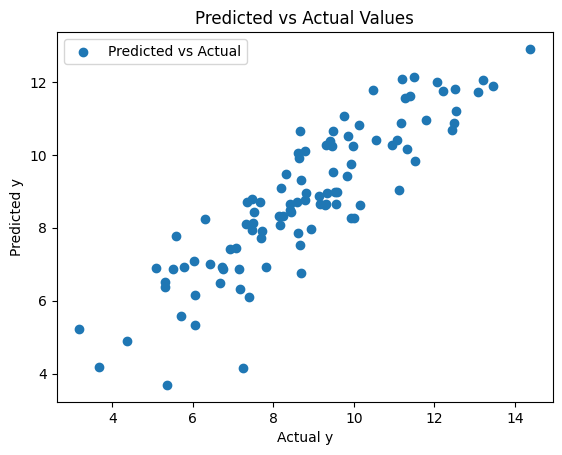

Learned parameters for multi-dimensional regression:
Weights: [2.11404748 3.73850678 5.18294889]
Bias: 2.9845126939020754
MSE for multi-dimensional regression: 1.1299724842080783
R2 Score for multi-dimensional regression: 0.7780068369897164


In [62]:
model_multi = MultiLinearRegression(learning_rate=0.01, epochs=5000)
model_multi.fit(X_multi, y_multi)
y_multi_pred = model_multi.predict(X_multi)

# Plot the results for multi-dimensional regression
model_multi.plot(X_multi, y_multi)

print("Learned parameters for multi-dimensional regression:")
print("Weights:", model_multi.weights)
print("Bias:", model_multi.bias)

# Predict and evaluate for multi-dimensional regression
print("MSE for multi-dimensional regression:", mean_squared_error(y_multi, y_multi_pred))
print("R2 Score for multi-dimensional regression:", r2_score(y_multi, y_multi_pred))

In [63]:
# Compare with sklearn's LinearRegression for multi-dimensional data
sk_model_multi = LinearRegression()
sk_model_multi.fit(X_multi, y_multi)
print(f"Custom Multi Weights: {model_multi.weights}")
print(f"Sklearn Multi Weights: {sk_model_multi.coef_}")
print(f"Custom Multi Bias: {model_multi.bias}")
print(f"Sklearn Multi Bias: {sk_model_multi.intercept_}")
print(f"Sklearn Multi MSE: {mean_squared_error(y_multi, sk_model_multi.predict(X_multi))}")
print(f"Sklearn Multi R2: {r2_score(y_multi, sk_model_multi.predict(X_multi))}")


Custom Multi Weights: [2.11404748 3.73850678 5.18294889]
Sklearn Multi Weights: [2.1232442  3.74558009 5.19724816]
Custom Multi Bias: 2.9845126939020754
Sklearn Multi Bias: 2.967801674410884
Sklearn Multi MSE: 1.1299432071968938
Sklearn Multi R2: 0.7780125887194329
